# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: Lectures 9, 10 

**Due date: Tuesday, June 07, 2022 at 18:00**

## Imports

In [67]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022s/blob/master/docs/homework_instructions.md).

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B.

- Model A confusion matrix

In [6]:
cm_A = pd.DataFrame(
    [[3, 10],
     [1, 106]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_A

,Predicted disease,Predicted no disease
Actual disease,3,10
Actual no disease,1,106


- Model B confusion matrix

In [7]:
cm_B = pd.DataFrame(
    [[8, 5],
     [12, 95]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_B

,Predicted disease,Predicted no disease
Actual disease,8,5
Actual no disease,12,95


### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

The class where the patient has the disease could be considered positive. It is because we want to find the patients who have the disease.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [8]:
results_dict = {"A": {}, "B": {}}

In [9]:
results_dict["A"]["accuracy"] = None
results_dict["B"]["accuracy"] = None

results_dict["A"]["accuracy"] = 109/120
results_dict["B"]["accuracy"] = 103/120



In [10]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Since Model A has a higher accuracy, I would choose Model A over B.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without calling `scikit-learn` functions.

In [20]:
results_dict["A"]["precision"] = None
results_dict["B"]["precision"] = None
results_dict["A"]["recall"] = None
results_dict["B"]["recall"] = None
results_dict["A"]["f1"] = None
results_dict["B"]["f1"] = None


def f1_score(precision, recall):
    return (2 * precision * recall) / (precision + recall)

results_dict["A"]["precision"] = 3/4
results_dict["B"]["precision"] = 8/20
results_dict["A"]["recall"] = 3/13
results_dict["B"]["recall"] = 8/13
results_dict["A"]["f1"] = f1_score(
    results_dict["A"]["precision"], results_dict["A"]["recall"]
)
results_dict["B"]["f1"] =  f1_score(
    results_dict["B"]["precision"], results_dict["B"]["recall"]
)



In [21]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [22]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [23]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [24]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [25]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [26]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [27]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333
precision,0.750000,0.400000
recall,0.230769,0.615385
f1,0.352941,0.484848


In [28]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333
precision,0.750000,0.400000
recall,0.230769,0.615385
f1,0.352941,0.484848


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

Recall is a more informative metric in this case because it is more crucial to detect all the people that may have the disease in comparison to reduing false positives. Based on this information, I would choose Model B since it has a higher recall value and f1 score.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [32]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [33]:
train_df["churn"].value_counts(normalize=True)

False    0.850407
True     0.149593
Name: churn, dtype: float64

Yes, I can observe class imbalance. Around 15% of the examples belong to the True class. Since our purpose is to find the churned customers, i.e, belonging to the True class, hence it is very important for us to predict that class more correctly.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [43]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [44]:
train_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False


Drop the column phone number since it is a unique feature that may not be very useful. 

One Hot Encoding Transformation: state, area code, international plan, voice mail plan. All of these features can be represented using a binary encoding of their columns, since they have a yes/no value or a finite set of values which can be represented using this transformation. 

Standardization: All other features can be standardized as we can consider them numeric.



In [47]:
categorical_features = ["area code", "state"]
binary_features = ["international plan", "voice mail plan"]
drop_features = ["phone number"]
numeric_features = list(
    set(train_df.columns)
    - set(["churn"])
    - set(binary_features)
    - set(categorical_features)
    - set(drop_features)
)

In [48]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ("drop", drop_features),
)

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [49]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['account length', 'total day calls',
                                  'total day charge', 'total intl minutes',
                                  'total night charge', 'total night minutes',
                                  'customer service calls', 'total eve calls',
                                  'total night calls', 'total eve charge',
                                  'total intl charge', 'total intl calls',
                                  'total eve minutes', 'total day minutes',
                                  'number vmail messages']),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary'),
                                 ['international plan', 'voice mail plan']),
                                ('onehotencoder-2',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['area code', 'state']),
                                ('drop', 'drop', ['phone number'])])

In [50]:
preprocessor.named_transformers_

{'standardscaler': StandardScaler(),
 'onehotencoder-1': OneHotEncoder(drop='if_binary'),
 'onehotencoder-2': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'drop': 'drop'}

In [55]:
ohe_columns = list(
    preprocessor.named_transformers_["onehotencoder-2"]
    .get_feature_names_out(categorical_features)
)
    
    
new_columns = numeric_features + binary_features + ohe_columns

In [59]:
df = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
df.head()

,account length,total day calls,total day charge,total intl minutes,total night charge,total night minutes,customer service calls,total eve calls,total night calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1402,-0.767893,-0.721211,0.618927,-1.645501,1.089926,1.088667,-0.415269,-1.156734,0.052115,0.069926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1855,-0.843585,1.655252,-1.293517,0.227019,-2.164029,-2.162302,0.337507,-1.207278,-0.720990,-1.166291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.544113,0.169963,-0.609654,1.919489,0.369252,0.369287,0.337507,0.157417,-0.463288,-2.211244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,0.165650,-0.473663,0.998611,-0.097071,1.596582,1.597736,-0.415269,0.258506,0.000574,-0.755774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2638,0.115188,0.764078,-0.994731,0.407069,0.792921,0.793839,0.337507,-0.246937,0.206736,1.196515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

1. Since the feature area code is a categorical column, it needs to be OHE transformed.

In [61]:
# 2. Possible values of area code
X_train["area code"].unique()

array([415, 510, 408])

In [62]:
# 3. New feature(s) created to replace area code
area_code_replacement = df.columns[df.columns.str.startswith("area code")]
area_code_replacement

Index(['area code_408', 'area code_415', 'area code_510'], dtype='object')

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any *warnings* the code produces (2 sentences max).

In [68]:
dummy_clf = DummyClassifier()

In [69]:
score_types = ["accuracy", "precision", "recall", "f1"]

<br><br>

In [71]:
for s in score_types:
    print(s, cross_val_score(dummy_clf, X_train, y_train, scoring=s).mean())

accuracy 0.8504075874681789
precision 0.0
recall 0.0
f1 0.0


/Users/mahaanjain/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahaanjain/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahaanjain/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahaanjain/opt/

We get this warning above because our dummy_clf always predicts false, so precision is undefined.

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [72]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True)).mean()

fit_time       0.066520
score_time     0.008573
test_score     0.855978
train_score    0.866481
dtype: float64

In [73]:
for s in score_types:
    print(s, cross_val_score(pipe, X_train, y_train, scoring=s).mean())

accuracy 0.8559777963625003
precision 0.548663382594417
recall 0.20931677018633543
f1 0.30273912862476837


Accuracy obtained is quite similar to DummyClassifer. All other scores are also defined as well. However, there is still a low f1 and recall score which could probably be due to class imbalance.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [75]:
pipe_1 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced"))
pd.DataFrame(cross_validate(pipe_1, X_train, y_train, return_train_score=True)).mean()

fit_time       0.028519
score_time     0.004634
test_score     0.760807
train_score    0.776252
dtype: float64

In [76]:
for s in score_types:
    print(s, cross_val_score(pipe_1, X_train, y_train, scoring=s).mean())

accuracy 0.7608072713236713
precision 0.35115409339151793
recall 0.6992132505175984
f1 0.46702681999685014


I prefer this model because although there is a decrease in accuracy, but the recall and f1 scores are much better.

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [77]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

In [79]:
param_grid = {
    "logisticregression__C": 2.0 ** np.arange(-4,4),
    "logisticregression__class_weight": [None, "balanced"]
}

In [81]:
search = GridSearchCV(
    pipe,
    param_grid,
    verbose=1,
    n_jobs=1,
    return_train_score=True,
    scoring="f1"
)

In [82]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['account '
                                                                          'length',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'charge',
                                                                          'total '
                                                                          'intl '
                                                                          'minutes',
                                                                          'total '
                                                                          'night '
                                                                          'charge',
                                                                          'total '
                                                                          'night '
                                                                          'minutes',
                                                                          'customer '
                                                                          'service '
                                                                          'calls',
                                                                          'total '
                                                                          'eve '
                                                                          'calls',
                                                                          'total '
                                                                          'night '
                                                                          'calls',
                                                                          'total '
                                                                          'eve '
                                                                          'charge',
                                                                          'to...
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['area '
                                                                          'code',
                                                                          'state']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['phone '
                                                                          'number'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=1,
             param_grid={'logisticregression__C': array([0.0625, 0.125 , 0.25  , 0.5   , 1.    , 2.    , 4.    , 8.    ]),
                         'logisticregression__class_weight': [None,
                                                              'balanced']},
             return_train_score=True

<br><br>

In [85]:
df = pd.DataFrame(search.cv_results_)[
    [
        "mean_test_score",
        "mean_train_score",
        "param_logisticregression__C",
        "param_logisticregression__class_weight",
        "rank_test_score"
    ]
]
df = df.sort_values(by="mean_test_score", ascending=False)
df

,mean_test_score,mean_train_score,param_logisticregression__C,param_logisticregression__class_weight,rank_test_score
1,0.481077,0.496341,0.0625,balanced,1
3,0.477458,0.503381,0.125,balanced,2
5,0.475169,0.507852,0.25,balanced,3
7,0.469676,0.513824,0.5,balanced,4
9,0.467027,0.512418,1.0,balanced,5
11,0.465481,0.512885,2.0,balanced,6
15,0.461991,0.513988,8.0,balanced,7
13,0.461813,0.514124,4.0,balanced,8
14,0.312894,0.371034,8.0,None,9
12,0.309597,0.372006,4.0,None,10


### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

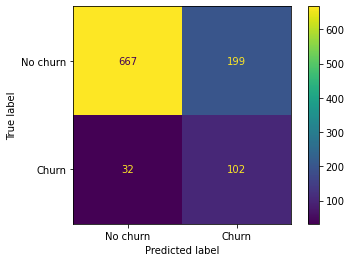

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay.from_estimator(
    search, X_test, y_test, display_labels=["No churn", "Churn"]
)

In [87]:
print(
    classification_report(
    y_test, search.predict(X_test), target_names=["No churn", "Churn"]
    )
)

              precision    recall  f1-score   support

    No churn       0.95      0.77      0.85       866
       Churn       0.34      0.76      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



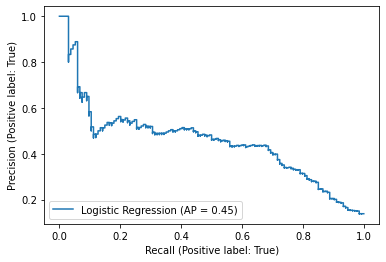

In [88]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(
    search, X_test, y_test, name="Logistic Regression"
)

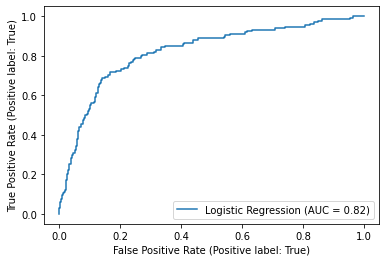

In [89]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(search, X_test, y_test, name="Logistic Regression")

In [91]:
from sklearn.metrics import roc_auc_score

print("AUC score: ", (roc_auc_score(y_test, search.predict_proba(X_test)[:, 1])))

AUC score:  0.8210937230705594


From the results, it can be observed that the best hyperparameters values are: C=0.0625 and class_weight=balanced with a mean validation score of 0.48. There is no visible overfitting in the validation set since the training scores and validation scores are quite close.

AUC score is 0.821, which means that positive examples have a bigger score 82.1% of the times.


<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [92]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [93]:
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9950,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875
3547,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715
4448,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917
6984,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197
4432,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140


In [97]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.870716,28.570918,5.422508,1.096515,1434.115734,3.064722,35.627757,-119.566976,2.069687
std,1.900132,12.582281,2.520931,0.491311,1130.309986,10.624706,2.134543,2.000519,1.154148
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.430476,1.005825,789.000000,2.429013,33.930000,-121.800000,1.194000
50%,3.529400,29.000000,5.227170,1.048765,1170.000000,2.816122,34.250000,-118.490000,1.804000
75%,4.750375,37.000000,6.051005,1.099493,1735.000000,3.278954,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


Ony scaling needs to be applied, since all features are numeric.

In [98]:
preprocessor = StandardScaler()

In [100]:
X_train, y_train = train_df.drop(columns=["MedHouseVal"]), train_df["MedHouseVal"]
X_test, y_test = test_df.drop(columns=["MedHouseVal"]), test_df["MedHouseVal"]

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [102]:
dummy_regressor = DummyRegressor()
pd.DataFrame(cross_validate(dummy_regressor, X_train, y_train, return_train_score=True)).mean()

fit_time       0.003978
score_time     0.000637
test_score    -0.000147
train_score    0.000000
dtype: float64

R^2 is the deafult scoring metric

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [104]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [106]:
results = {}
def scores_function(models, preprocessor, scoring="f1"):
    for(name, model) in models.items():
        pipe = make_pipeline(preprocessor, model)
        scores = cross_validate(
            pipe, X_train, y_train, return_train_score=True, scoring=scoring
        )
        df = pd.DataFrame(scores)
        results[name] = df.mean()
    return pd.DataFrame(results)

scores_function(models, preprocessor, scoring=score_types_reg)

,Ridge,Random Forest
fit_time,0.005194,5.194580
score_time,0.002676,0.080488
test_neg_mean_squared_error,-0.683433,-0.263991
train_neg_mean_squared_error,-0.524369,-0.036797
test_neg_root_mean_squared_error,-0.810381,-0.513674
train_neg_root_mean_squared_error,-0.724132,-0.191816
test_neg_mean_absolute_error,-0.535444,-0.335223
train_neg_mean_absolute_error,-0.531388,-0.125047
test_r2,0.481744,0.801531
train_r2,0.606300,0.972370


3. Both models are better in performance as compared to the baseline (DummyRegressor). Random Forest seems to be performing well and has better values for all metrics, however, is slower in comparison to Ridge.

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [ ]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [113]:
print("best hyperparameters: ", (random_search_ridge.best_params_))
print("best model score: ", (random_search_ridge.best_score_))
print(
    "train score: ", (random_search_ridge.score(X_train, y_train))
)
print(
    "test score: ", (random_search_ridge.score(X_test, y_test))
)

best hyperparameters:  {'ridge__alpha': 26.789982776216593}
best model score:  -31.887175581655296
train score:  -31.83469137553898
test score:  -31.083583501442646


<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [114]:
df = pd.DataFrame(
    data={
        "features": X_train.columns,
        "coefficients": random_search_ridge.best_estimator_.named_steps["ridge"].coef_,
    }
)
df.sort_values("coefficients")

,features,coefficients
6,Latitude,-0.870521
7,Longitude,-0.835697
2,AveRooms,-0.276697
5,AveOccup,-0.041684
4,Population,-0.006641
1,HouseAge,0.117318
3,AveBedrms,0.311874
0,MedInc,0.834711


If AveBedrms, MedInc are increased, then housing prices would also increase.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 